In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt


import numpy as np# using LSTM
import pandas as pd# and data set of positive/negative marked Twitter twits 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [5]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

4472
16986


In [6]:
#
#Training and testing
#

#Replace all 'retwitts'
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

#Training data set
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None
(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


In [32]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)
validation_size = 1500

#testing data set
X_validate = X_train[:-validation_size]
Y_validate = Y_train[:-validation_size]

X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]

score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0

for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

#score: 0.44
#acc: 0.83
#pos_acc 59.8705501618123 %
#neg_acc 90.76406381192275 %

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
 - 19s - loss: 0.4377 - acc: 0.8144
Epoch 2/7
 - 17s - loss: 0.3214 - acc: 0.8619
Epoch 3/7
 - 19s - loss: 0.2794 - acc: 0.8862
Epoch 4/7
 - 16s - loss: 0.2494 - acc: 0.8964
Epoch 5/7
 - 16s - loss: 0.2255 - acc: 0.9083
Epoch 6/7
 - 26s - loss: 0.2036 - acc: 0.9200
Epoch 7/7
 - 16s - loss: 0.1818 - acc: 0.9246
score: 0.46
acc: 0.84
pos_acc 82.83518360375747 %
neg_acc 97.78614124418861 %


In [38]:
history = model.fit(X_train,
                    Y_train,
                    epochs=7,
                    batch_size=32,
                    validation_data=(X_validate, Y_validate),
                    verbose=1)

Train on 7188 samples, validate on 5688 samples
Epoch 1/7
7188/7188 [==============================] - 22s 3ms/step - loss: 0.1709 - acc: 0.9324 - val_loss: 0.1288 - val_acc: 0.9508
Epoch 2/7
7188/7188 [==============================] - 21s 3ms/step - loss: 0.1537 - acc: 0.9360 - val_loss: 0.1090 - val_acc: 0.9585
Epoch 3/7
7188/7188 [==============================] - 21s 3ms/step - loss: 0.1395 - acc: 0.9449 - val_loss: 0.0977 - val_acc: 0.9613
Epoch 4/7
7188/7188 [==============================] - 22s 3ms/step - loss: 0.1352 - acc: 0.9450 - val_loss: 0.0908 - val_acc: 0.9641
Epoch 5/7
7188/7188 [==============================] - 22s 3ms/step - loss: 0.1251 - acc: 0.9494 - val_loss: 0.0872 - val_acc: 0.9657
Epoch 6/7
7188/7188 [==============================] - 24s 3ms/step - loss: 0.1210 - acc: 0.9517 - val_loss: 0.0831 - val_acc: 0.9675
Epoch 7/7
7188/7188 [==============================] - 25s 3ms/step - loss: 0.1119 - acc: 0.9527 - val_loss: 0.0779 - val_acc: 0.9691


In [5]:
model.save('model.h5')

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'All of my cats in a row',
'When my cat sits down or lying, she looks like a Furby toy!',
'The cat from outer space',
'Killing is my buisiness and buisiness is good - Dave Mustain'
]

vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(corpus).todense()

model.predict(vector)

array([[0.55328447, 0.44671553],
       [0.9053344 , 0.09466552],
       [0.79417795, 0.20582208],
       [0.6057186 , 0.39428136]], dtype=float32)

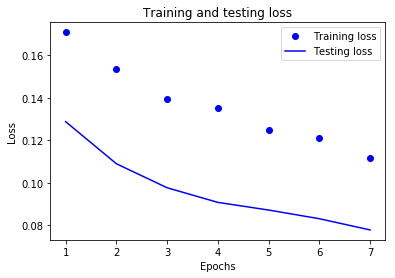

In [47]:
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

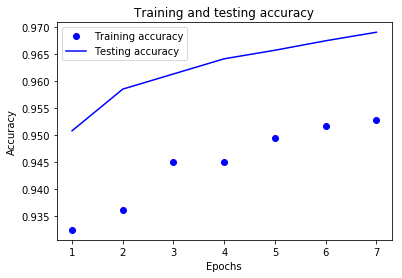

In [41]:
plt.clf()  
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Testing accuracy')
plt.title('Training and testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()